# Problem set 2

## Author: Ben Dykstra



In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18.5, 10.5

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Linear Algebra

In [2]:
x = np.array([2,3,2,1,1])

Problem 1. a)

In [3]:
x = pd.get_dummies(x)
x['const'] = np.ones((5))
print x

     1    2    3  const
0  0.0  1.0  0.0    1.0
1  0.0  0.0  1.0    1.0
2  0.0  1.0  0.0    1.0
3  1.0  0.0  0.0    1.0
4  1.0  0.0  0.0    1.0


Column 1 identifies the samples where the sample has less than a high school education. Column 2 identifies the samples that have at least a high school degree and less than a college degree. Column 3 gives the samples where they have a 4 year degree or more. The constant column is just ones that will be fitted via OLS.

The rank of the matrix is 3, meaning that there are 3 independent columns present.

In [4]:
np.linalg.matrix_rank(x)

3

Problem 2.


In [5]:
z = np.matrix([[2,6],[9,2]])
m = np.matrix([[4],[8]])
d = np.matrix([[2],[11]])

In [6]:
z.shape,m.shape,d.shape

((2, 2), (2, 1), (2, 1))

2.a)

In [7]:
print np.linalg.inv(z)

[[-0.04  0.12]
 [ 0.18 -0.04]]


2.b)

In [8]:
z_product = z.T * z
z_product.shape

(2, 2)

In [9]:
z_product

matrix([[85, 30],
        [30, 40]])

2.c)

In [10]:
m.T * z.T  == (z*m).T

matrix([[ True,  True]], dtype=bool)

2.d)

In [11]:
np.dot(np.dot(m.T, z),d), np.dot(np.dot(d.T,z.T),m)

(matrix([[600]]), matrix([[600]]))

## The Ordinary Least Squares Model

In [12]:
mroz = pd.read_stata("http://rlhick.people.wm.edu/econ407/data/mroz.dta")

In [13]:
mroz.describe()

,lfp,whrs,kl6,k618,wa,we,ww,rpwg,hhrs,ha,he,hw,faminc,mtr,wmed,wfed,un,cit,ax
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000
mean,0.568393,740.576361,0.237716,1.353254,42.537849,12.286853,2.374565,1.849734,2267.270916,45.120850,12.491368,7.482180,23080.594954,0.678862,9.250996,8.808765,8.623506,0.642762,10.63081
std,0.495630,871.314216,0.523959,1.319874,8.072574,2.280246,3.241837,2.419891,595.566649,8.058793,3.020804,4.230559,12190.202026,0.083495,3.367468,3.572290,3.114935,0.479504,8.06913
min,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.000000,0.000000,175.000000,30.000000,3.000000,0.412100,1500.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,36.000000,12.000000,0.000000,0.000000,1928.000000,38.000000,11.000000,4.788300,15428.000000,0.621500,7.000000,7.000000,7.500000,0.000000,4.00000
50%,1.000000,288.000000,0.000000,1.000000,43.000000,12.000000,1.625000,0.000000,2164.000000,46.000000,12.000000,6.975800,20880.000000,0.691500,10.000000,7.000000,7.500000,1.000000,9.00000
75%,1.000000,1516.000000,0.000000,2.000000,49.000000,13.000000,3.787900,3.580000,2553.000000,52.000000,15.000000,9.166700,28200.000000,0.721500,12.000000,12.000000,11.000000,1.000000,15.00000
max,1.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,17.000000,40.508999,96000.000000,0.941500,17.000000,17.000000,14.000000,1.000000,45.00000


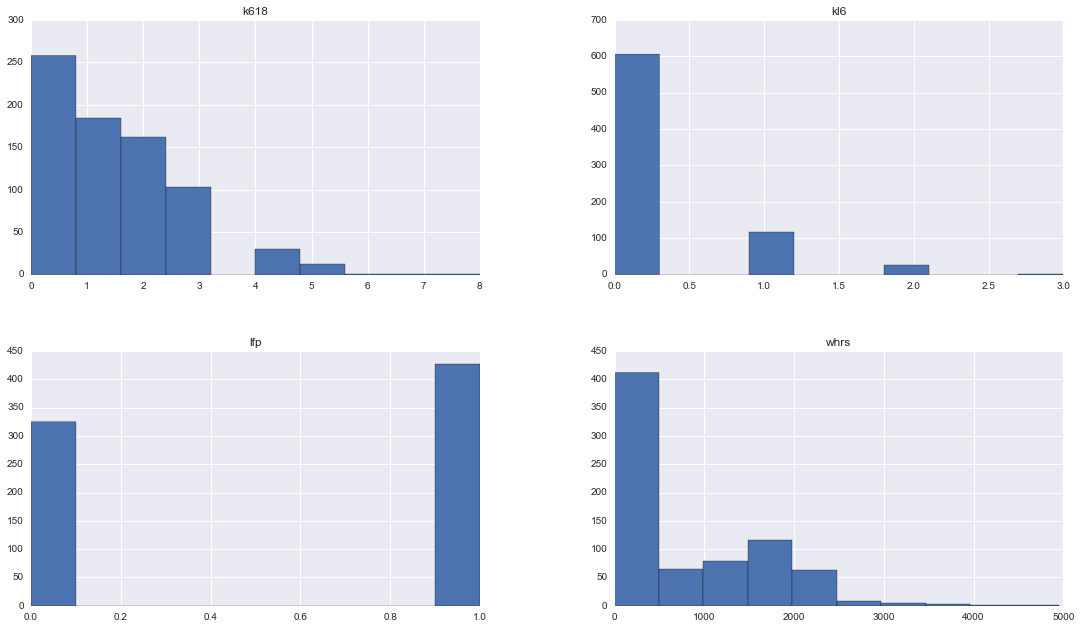

In [14]:
mroz[['lfp', 'whrs', 'kl6', 'k618']].hist();

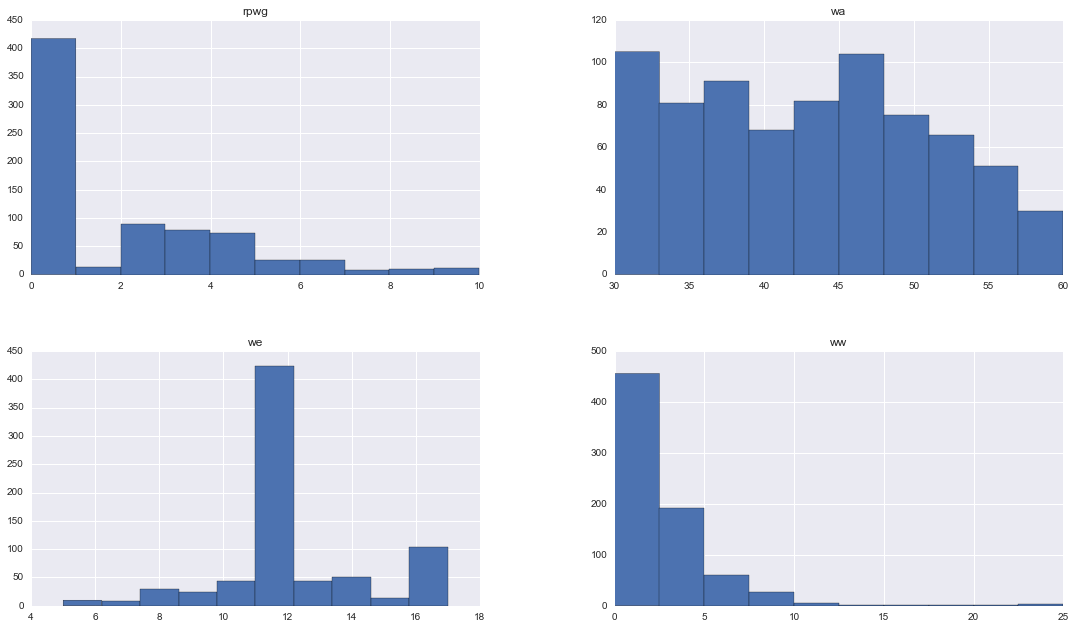

In [15]:
mroz[mroz.columns.values[4:8]].hist();

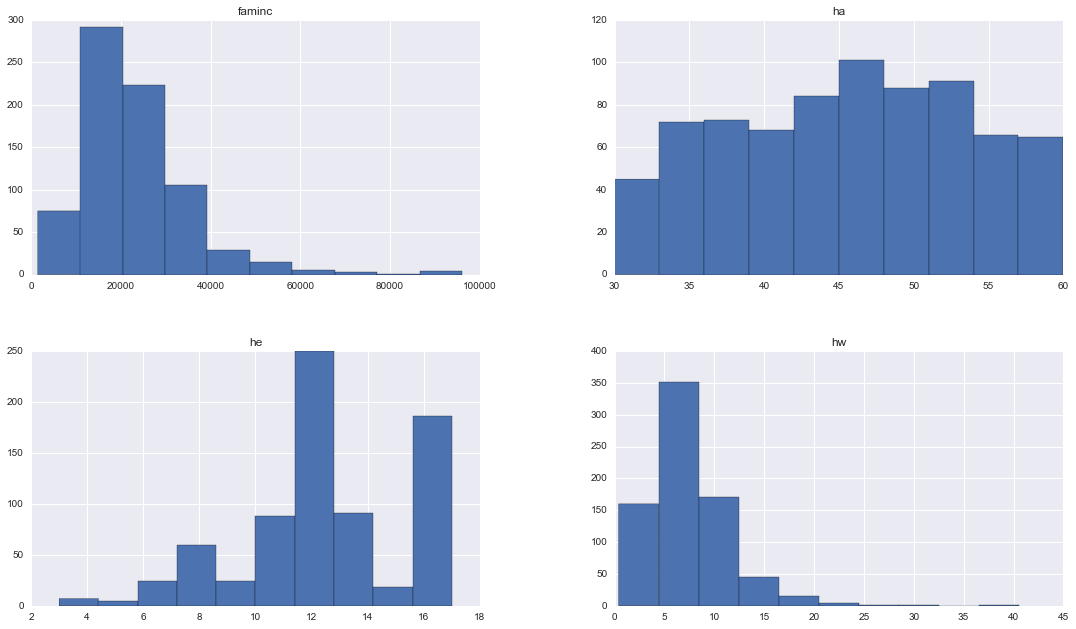

In [16]:
mroz[mroz.columns.values[9:13]].hist();

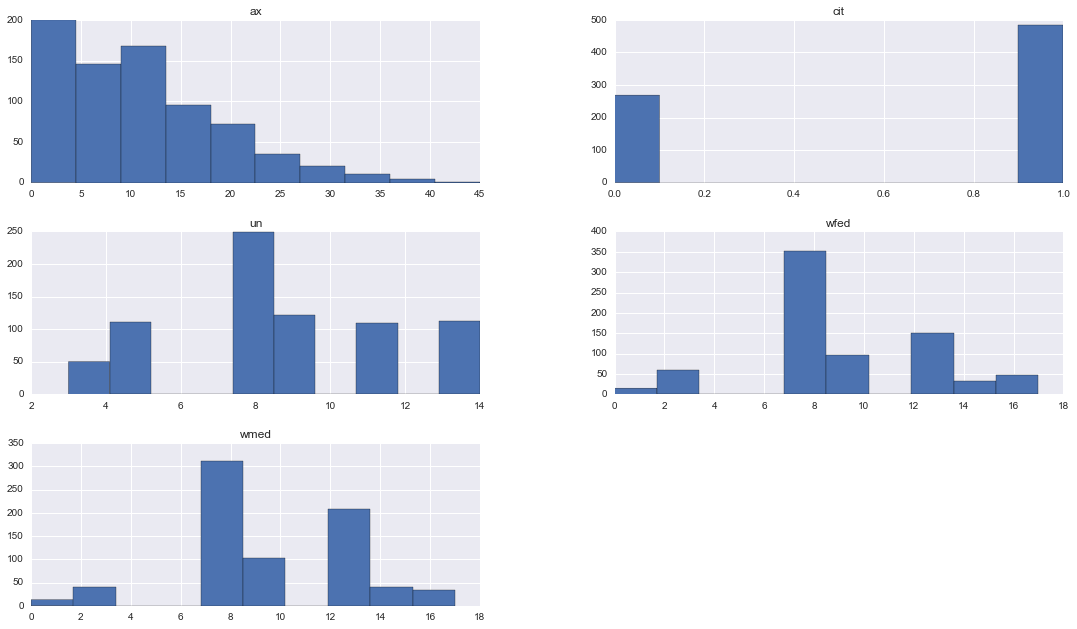

In [17]:
mroz[mroz.columns.values[14:19]].hist();

In [18]:
workers_only = mroz[mroz.lfp == 1]
x = workers_only[['kl6', 'k618', 'wa', 'we', 'ww', 'he', 'hw', 'ax']]
y = workers_only['whrs']

In the sample, there were 328 wives who did not work at all.

In [19]:
mroz.shape, workers_only.shape

((753, 19), (428, 19))

Lets examine some interesting variables:

We'll start with the number of kids under 6, the number of kids between 6 and 18 and their relationship to working hours. I expect that as the number of kids increases, the number of hours worked will decrease.

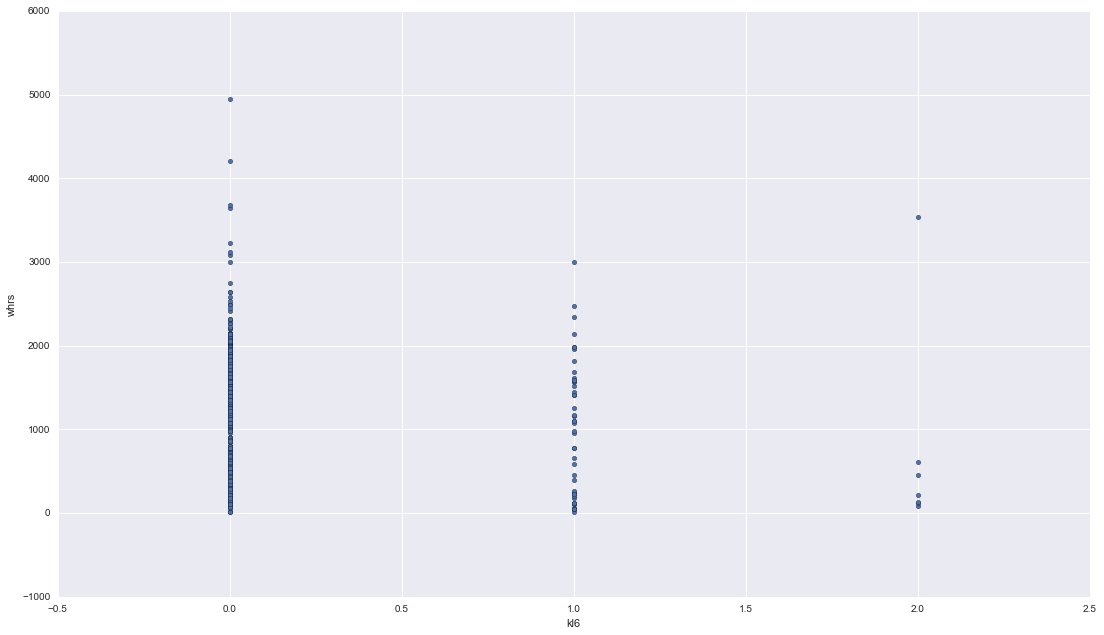

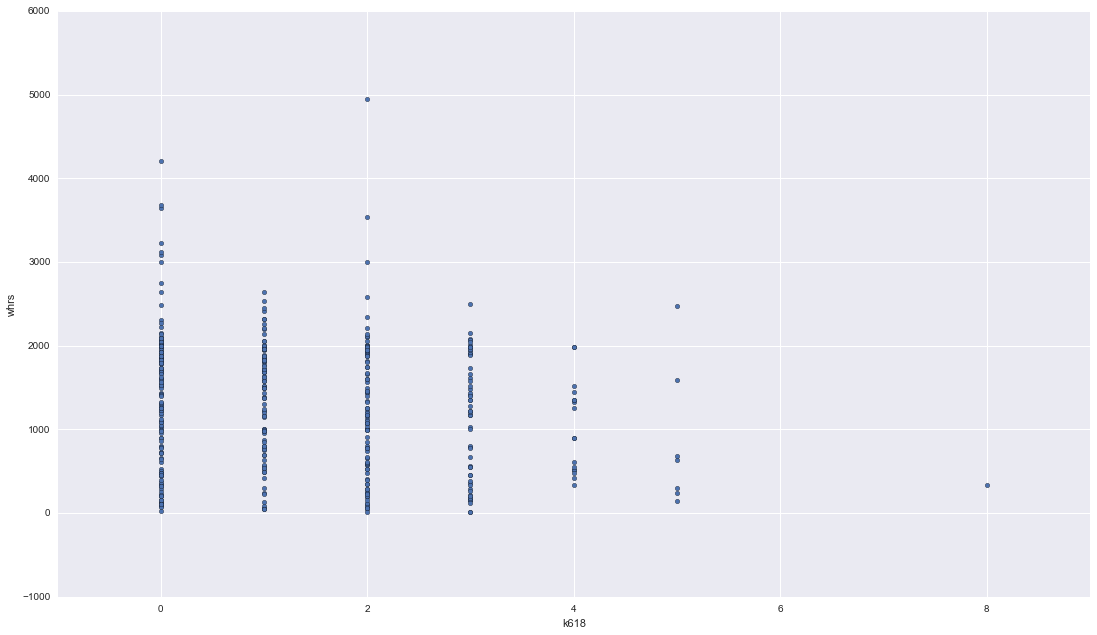

In [20]:
workers_only.plot(x = 'kl6', y = 'whrs', kind = 'scatter');workers_only.plot(x = 'k618', y = 'whrs', kind = 'scatter');

As you can see, there is a definite negative trend in the number of kids in a family and the number of hours a woman worked. This is probably because a woman was expected to be the caretaker of the kids. 

The other variables I have included the wife's age, educational attainment, average hourly earnings, husbands education, husband's wage and years of experience that the wife has. I expect that the wife's age, husbands education and wage to have a negative effect on the number of hours worked. The rationale being that as age increases, the wife is able to work less, and as husband's wage increases, there is less need to work for the wife. As for the wife's educational attainment, hourly earnings, and years of experience, I think that those will positively influence the number of hours worked. If someone earns more per hour, they are likely to work more (to a certain extent). More years of experience indicates establishment in the workforce, so on average they probably work more than someone who does not have as much experience.

Lets see how the regression goes

In [21]:
x_const = sm.add_constant(x)

results = sm.OLS(y, x_const).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   whrs   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     9.171
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           1.18e-11
Time:                        00:10:39   Log-Likelihood:                -3420.4
No. Observations:                 428   AIC:                             6859.
Df Residuals:                     419   BIC:                             6895.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2138.9036    329.091      6.499      0.000      1492.028  2785.779
kl6         -315.9507     95.772     -3.299      0.001      -504.205  -127.696
k618         -75.5532     30.145     -2.506      0.013      -134.808   -16.298
wa           -20.0659      5.704     -3.518      0.000       -31.278    -8.854
we             0.7035     20.187      0.035      0.972       -38.978    40.385
ww           -24.1790     11.416     -2.118      0.035       -46.619    -1.738
he            -8.5808     15.057     -0.570      0.569       -38.178    21.016
hw            -6.1519     11.112     -0.554      0.580       -27.994    15.690
ax            30.4771      5.219      5.840      0.000        20.219    40.735
==============================================================================
Omnibus:                       26.262   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.094
Skew:                           0.457   Prob(JB):                     3.24e-09
Kurtosis:                       4.165   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The robust results

In [22]:
robust_results = results.get_robustcov_results();

robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   whrs   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     9.969
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           9.75e-13
Time:                        00:10:39   Log-Likelihood:                -3420.4
No. Observations:                 428   AIC:                             6859.
Df Residuals:                     419   BIC:                             6895.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2138.9036    336.539      6.356      0.000      1477.387  2800.420
kl6         -315.9507    124.818     -2.531      0.012      -561.298   -70.603
k618         -75.5532     31.065     -2.432      0.015      -136.616   -14.491
wa           -20.0659      5.752     -3.488      0.001       -31.373    -8.759
we             0.7035     20.838      0.034      0.973       -40.257    41.664
ww           -24.1790     10.078     -2.399      0.017       -43.988    -4.370
he            -8.5808     16.270     -0.527      0.598       -40.562    23.400
hw            -6.1519     10.577     -0.582      0.561       -26.943    14.639
ax            30.4771      5.378      5.667      0.000        19.906    41.048
==============================================================================
Omnibus:                       26.262   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.094
Skew:                           0.457   Prob(JB):                     3.24e-09
Kurtosis:                       4.165   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Okay, so I was right about the variables that I predicted to have a negative coefficient (wa, he, hw, kl6, k618) and wrong about a wife's wage being positively correlated. The robust R2 is pretty abysmal at 0.149. Lets go through the coefficients and their meanings:

    -kl6: On average, every new kid less that 6 years old decreases a wife's working hours by about 316 hours(!!)
    -k618: Every child between 6 and 18 years old decreases working hours by 75 hours
    -wa: For every year older that a woman is, she works on average 20 less hours
    -we: For every year of education, a woman only works .7 more hours per a year.
    -ww: For every extra dollar that a woman earns, she works 24 less hours. I think that this is interesting, maybe because only a finite amount of money was needed, so only so much work had to be done.
    -he: AS SUSPECTED, the amount of education and wage that the husband makes both correspond to 8.5 and 6 less hours of work, respectively.
    -ax: Every year in the work force corresponds to an average of 30 more hours of work.


Now, lets check out the residual plots now to see if there is any structure in them

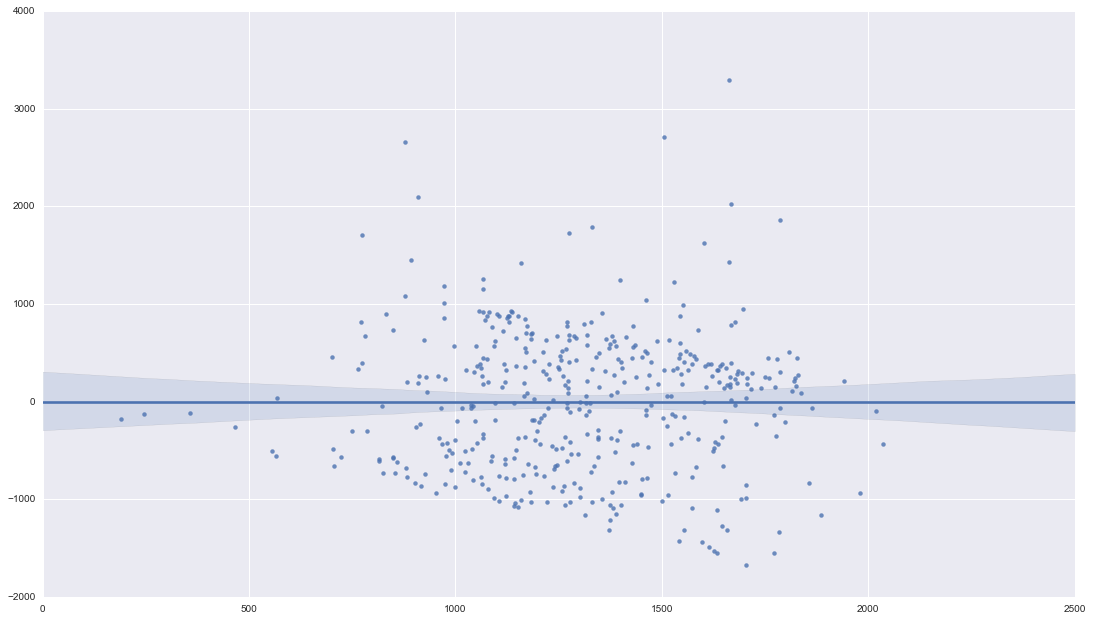

In [23]:
sns.regplot(robust_results.predict(x_const),robust_results.resid); #predicted values versus residuals

The errors are pretty normally distributed, so that's good. Tails are a little fat though.

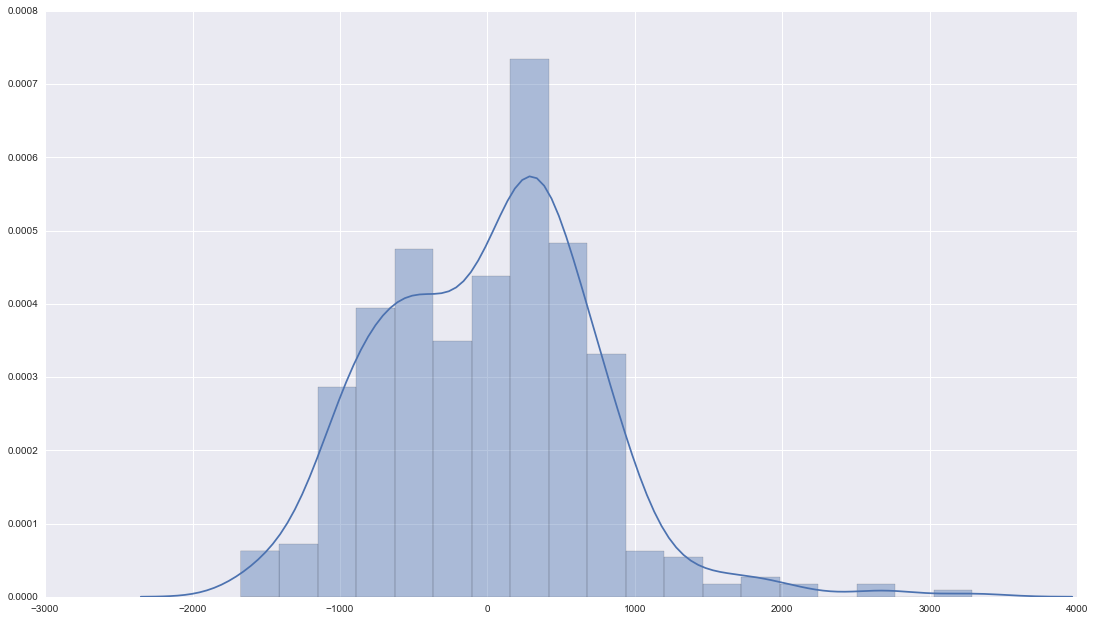

In [24]:
sns.distplot(robust_results.resid);

Part C)

estimate b, using matrix algebra stuff

In [25]:
x_mat = np.matrix(x_const)
y_mat = np.matrix(y)
y_mat = np.reshape(y_mat, (428,1))

b = np.linalg.inv(x_mat.T*x_mat)*x_mat.T*y_mat
print b

[[  2.13890186e+03]
 [ -3.15950989e+02]
 [ -7.55534286e+01]
 [ -2.00659866e+01]
 [  7.03317642e-01]
 [ -2.41790237e+01]
 [ -8.58093739e+00]
 [ -6.15144396e+00]
 [  3.04771080e+01]]


It all checks out. Linear algebra isn't broken.

get model residuals to get rmse, standard error and t-statistics

In [26]:

y_hat = x_mat*b
resids = y_mat - x_mat*b

mse = np.sum(np.square(resids))/resids.shape[0]
rmse = mse**0.5

s2 = (resids.T * resids) / (x_mat.shape[0] - x_mat.shape[1])
s2 = np.array(s2)[0][0]
std_error_b = np.sqrt(np.diagonal(s2*np.linalg.inv(x_mat.T*x_mat)))

t_stats = [np.asarray(b[i])/std_error_b[i] for i in xrange(b.shape[0])]


In [27]:
print "root mean squared error: ", rmse
print
print "standard error of betas: ", std_error_b
print
print "  t-statistics of betas: ", t_stats

root mean squared error:  715.267076451

standard error of betas:  [ 329.09130859   95.77241516   30.14530945    5.70416546   20.18745422
   11.41637135   15.05718422   11.11190033    5.21877289]

  t-statistics of betas:  [array([[ 6.49941778]], dtype=float32), array([[-3.2989769]], dtype=float32), array([[-2.50630784]], dtype=float32), array([[-3.51777792]], dtype=float32), array([[ 0.03483934]], dtype=float32), array([[-2.11792541]], dtype=float32), array([[-0.5698899]], dtype=float32), array([[-0.55359066]], dtype=float32), array([[ 5.83989906]], dtype=float32)]


part 2)

Calculate model R2 and interpret

In [28]:
sse = np.sum(np.square(resids))
sst = np.sum(np.square(y - np.mean(y)))

r2 = 1 - sse/sst
print "R2: ", r2

R2:  0.149015102084


About 15 % of the variation in y is accounted for by the independent variables

part 3)

Calculate the robust standard errors

In [29]:
#1. recover model residuals and predictions
pred = x_mat*b #resids already defined


In [30]:
#2.
r = np.diagonal(resids*resids.T) / mse #best estimate for variance of e_i / average of sum of squared 

In [31]:
r.shape

(428,)

In [32]:
e2 = np.square(resids)
v = np.diagflat(e2)
v = np.matrix(v)
robust_err = np.linalg.inv(x_mat.T * x_mat) * x_mat.T * v * x_mat * np.linalg.inv(x_mat.T*x_mat)
print "These are the robust standard errors: ", np.sqrt(np.diagonal(robust_err))

These are the robust standard errors:  [ 332.98275757  123.49861145   30.73651505    5.6914854    20.61815071
    9.9711895    16.09802628   10.46558762    5.3210268 ]


Part D)

first, the canned breush-pagan test

In [33]:
het_test = sm.stats.diagnostic.het_breushpagan(results.resid, x_const)
print "The f-statistic of the null hypothesis that the error variance \ndoes not depend on x: ", het_test[2]
print "The p-value for the f-statistic: ", het_test[3]
print "\nConclusion: the error variance more than likely depends on x"

The f-statistic of the null hypothesis that the error variance 
does not depend on x:  2.12533195588
The p-value for the f-statistic:  0.0324224837531

Conclusion: the error variance more than likely depends on x


Now, we do it ***~manually~***

here are the steps:
    1. Recover model residuals e = y - xb
    2. Calculate each observations estimate of the error variance
        - s = diagonal(ee') / mse
    3. Run the following auxiliary regression: r = g0 + g1*y_hat + v and then recover the model sum of squares
    4. Using MSS / 2, run the hypothesis test:
        - H_0: variance_i = variance for all i in N
        - H_1: vaiance_i != variance for i in N

step 1 is already down because I saved that variable as resids way up top.

In [34]:
#1. get predictions
pred = x_mat*b #resids already defined
#2
r = np.diagonal(resids*resids.T)/ mse

In [35]:
#3. run regression r = g0 + g1*y_hat + u and recover model sum of squares
y_hat_const = sm.add_constant(y_hat)
het_results = sm.OLS(r, y_hat_const).fit()
r_hat = het_results.predict(y_hat_const) #predictions
weird = r_hat - np.mean(r_hat) #idk
weird = np.reshape(weird, (428,1))
weird = np.matrix(weird)
mss = weird.T * weird

In [36]:
mss / 2

matrix([[ 1.32276718]])

The probability of observing that value from a chi-square distribution with 1 degree of freedom is .25. I don't reject the null hypothesis.